In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
data.head(4)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


In [4]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
data = data.drop(columns = ['Country','Region','Happiness Rank'], axis =1)

In [7]:
data.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
#Checking how the data is distributed with the help of distplot

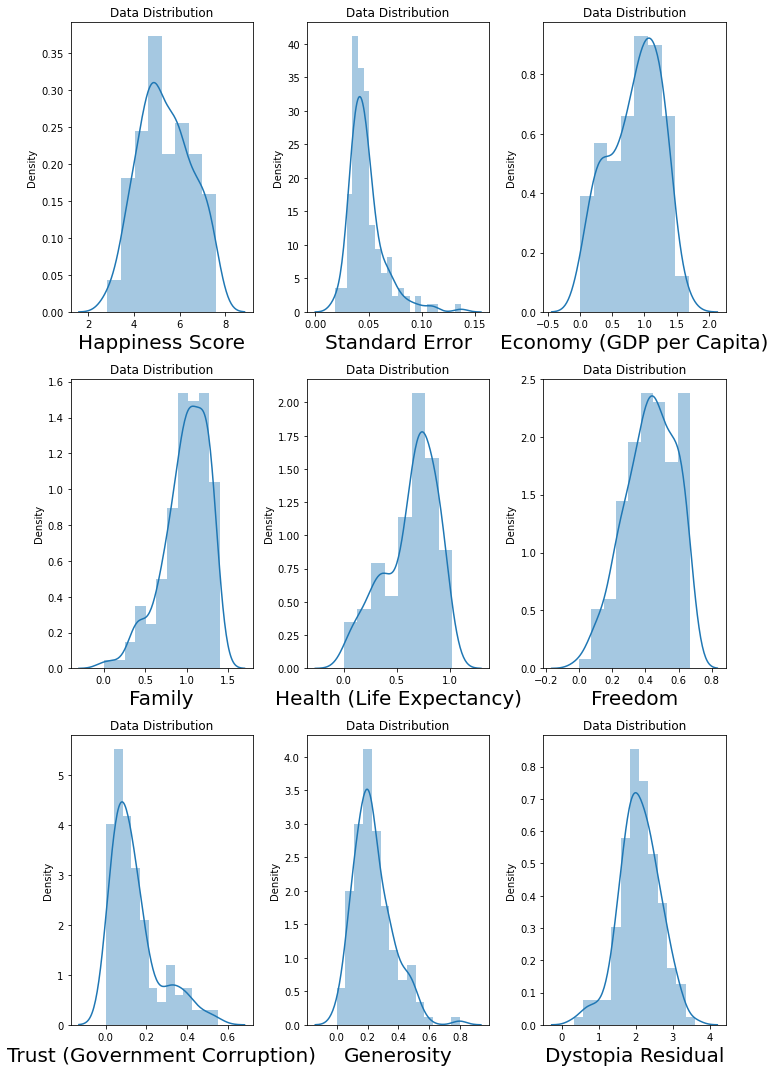

In [13]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Data Distribution')
    
    plotnumber +=1
plt.tight_layout()

In [14]:
# With the above plotting we can see that there is a bit of skewness in Standard Error, Generosity using Quantile Method

In [16]:
q = data['Standard Error'].quantile(0.99)
new_data = data[data['Standard Error']<q]

In [17]:
q = new_data['Generosity'].quantile(0.98)
new_data = new_data[new_data['Generosity']<q]

In [18]:
#Now checking again the data distribution

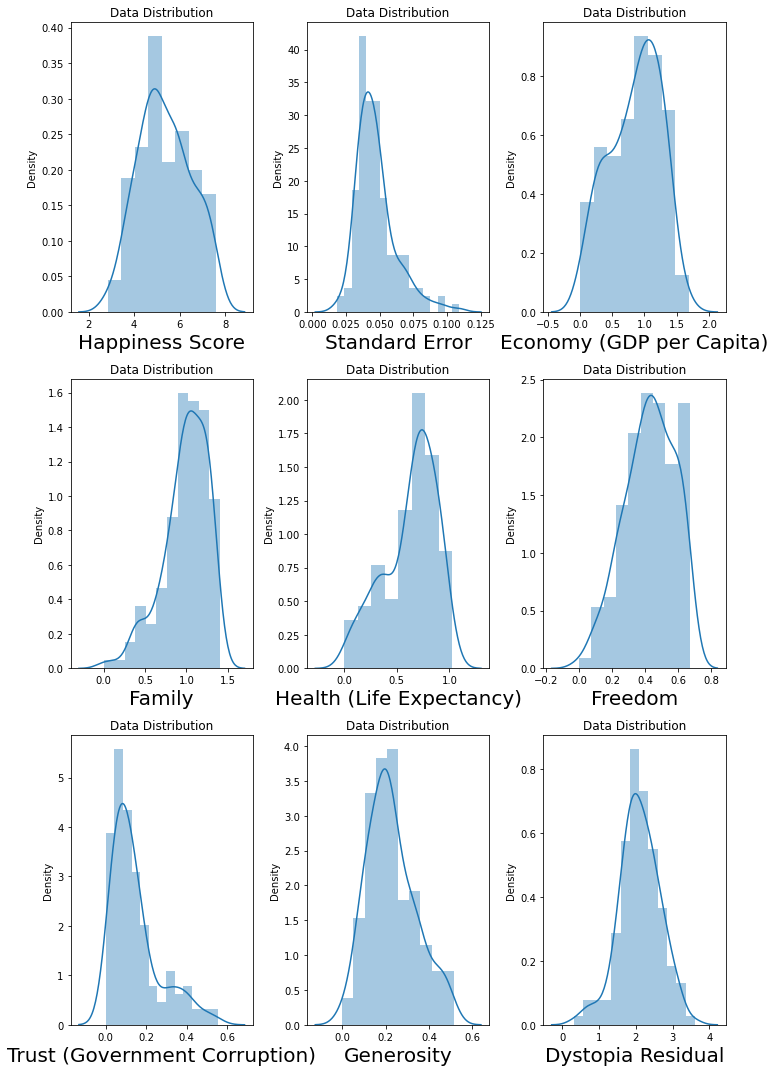

In [19]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in new_data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Data Distribution')
    
    plotnumber +=1
plt.tight_layout()

In [21]:
#Now will check the collinearity between the features with the help of heatmap.

In [22]:
corr_mat = new_data.corr()
corr_mat

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.182346,0.779994,0.732782,0.718228,0.559410,0.402076,0.186533,0.546910
Standard Error,-0.182346,1.000000,-0.190293,-0.127640,-0.329541,-0.127262,-0.140018,-0.050697,0.045136
Economy (GDP per Capita),0.779994,-0.190293,1.000000,0.638524,0.813974,0.358127,0.307020,-0.002155,0.051463
Family,0.732782,-0.127640,0.638524,1.000000,0.518761,0.427490,0.211915,0.079331,0.153939
Health (Life Expectancy),0.718228,-0.329541,0.813974,0.518761,1.000000,0.344478,0.245743,0.101237,0.029562
Freedom,0.559410,-0.127262,0.358127,0.427490,0.344478,1.000000,0.502280,0.377486,0.077174
Trust (Government Corruption),0.402076,-0.140018,0.307020,0.211915,0.245743,0.502280,1.000000,0.302674,-0.018511
Generosity,0.186533,-0.050697,-0.002155,0.079331,0.101237,0.377486,0.302674,1.000000,-0.067945
Dystopia Residual,0.546910,0.045136,0.051463,0.153939,0.029562,0.077174,-0.018511,-0.067945,1.000000


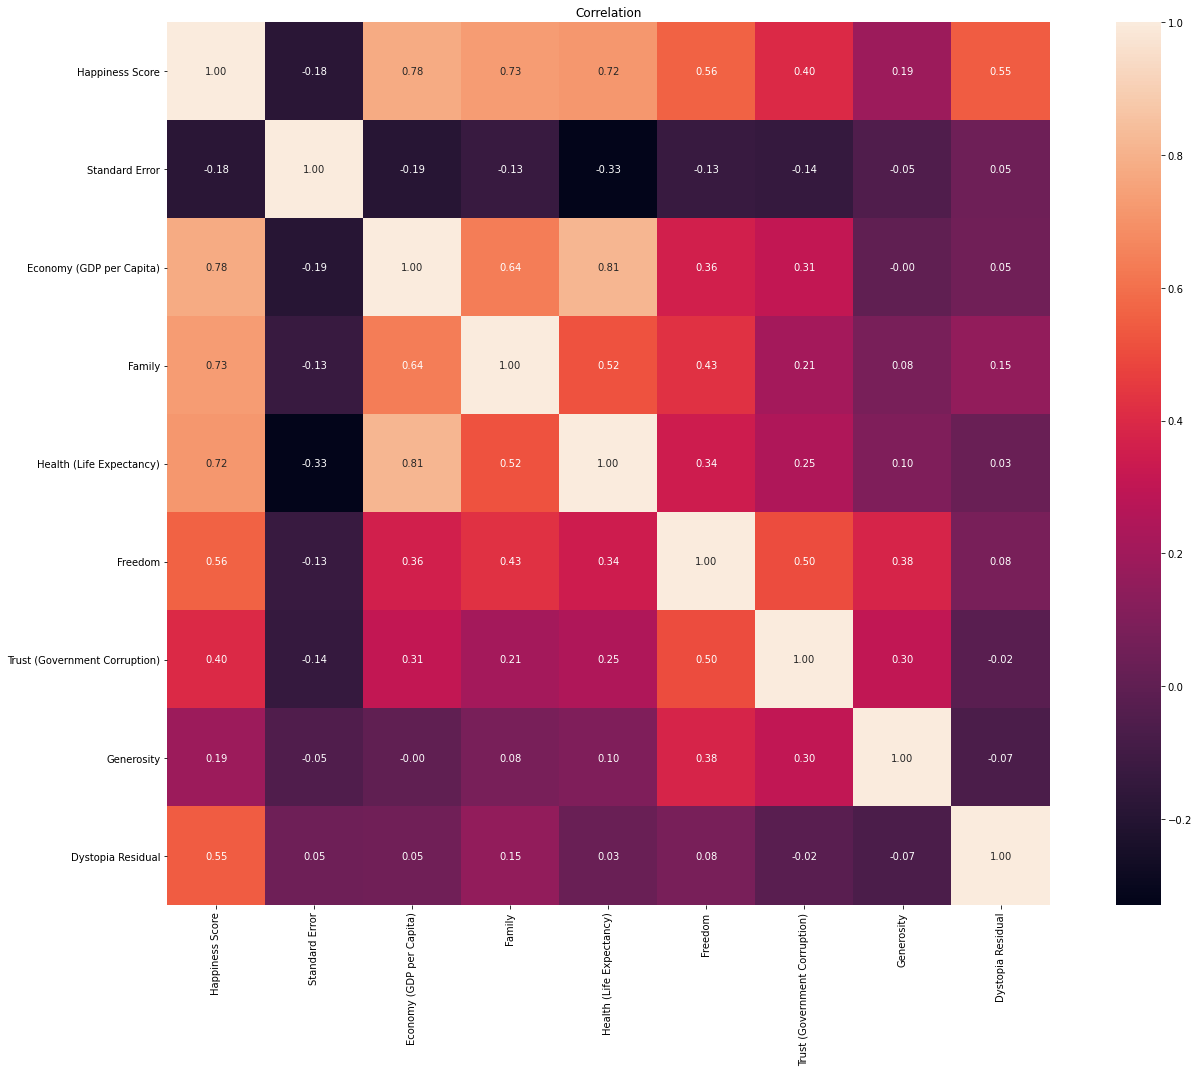

In [23]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True,cbar=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

In [24]:
# with above observation there seems to be a bit of relation between health and economy we will check that with scatter plot

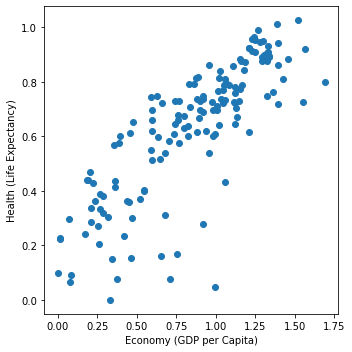

In [35]:
plt.figure(figsize=[5,5],facecolor='white')
plt.scatter(new_data['Economy (GDP per Capita)'],new_data['Health (Life Expectancy)'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy)')
plt.tight_layout()

In [36]:
# With this we find out that there is some relation between the above two as there is positive trend in the plot

In [37]:
# Now will plot scatter plot for relation with the label

In [38]:
#Deviding the dataset

In [40]:
x = new_data.drop(['Happiness Score'], axis = 1)
y = new_data['Happiness Score']

In [41]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [42]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 152, dtype: float64

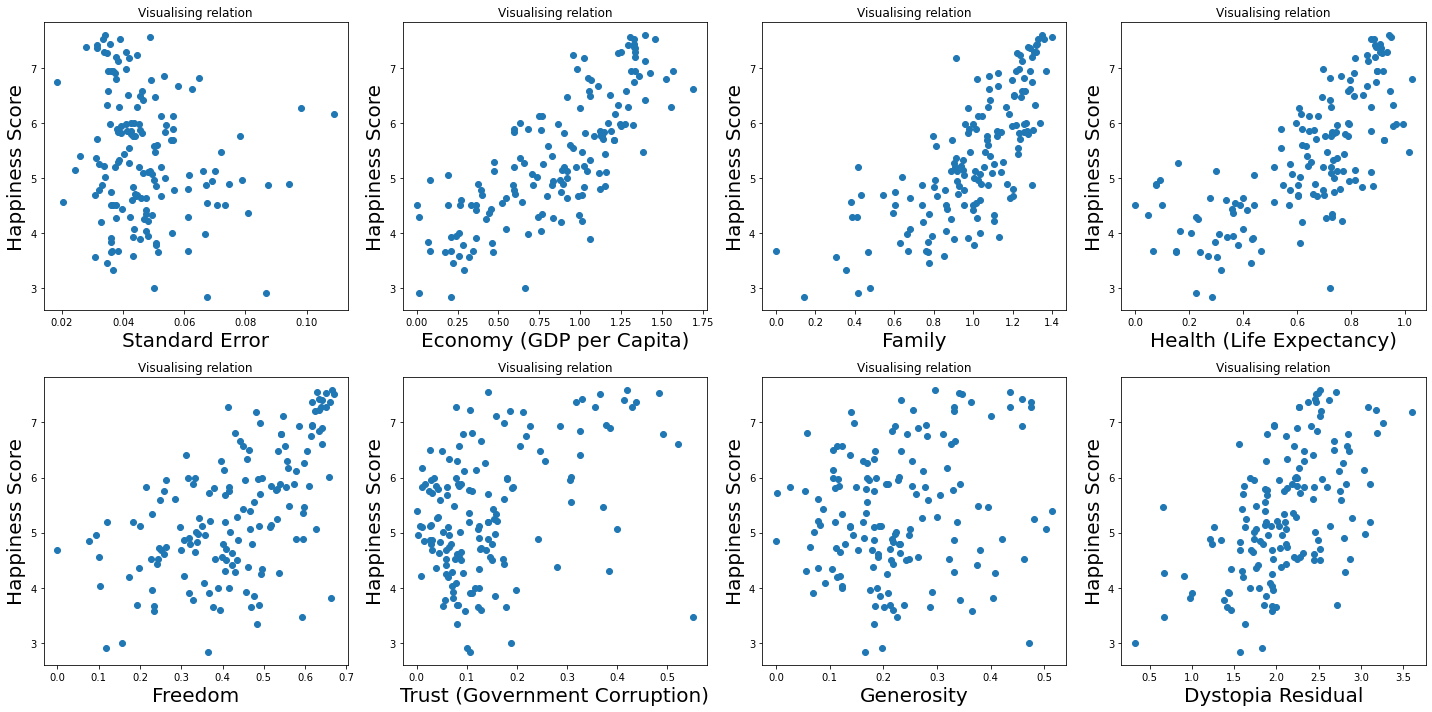

In [46]:
plt.figure(figsize=(20,10), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Happiness Score', fontsize = 20)
        plt.title('Visualising relation')
    
    plotnumber +=1
plt.tight_layout()

In [47]:
#Build the model

In [48]:
# Import Standard Scaler to scale the data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [58]:
x_scaled.shape

(152, 8)

In [56]:
#Importing Train Test Split to train and test the model

In [55]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 390)

In [75]:
#Now Model Initiating and Training

In [77]:
LR = LinearRegression()

In [78]:
LR.fit(x_train,y_train)

LinearRegression()

In [79]:
#Prediction Scores

In [83]:
new_data.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [84]:
print(LR.predict(scaler.transform([[0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201]])))

[7.5608328]


In [85]:
#Adjusted R2 score to check how well the model fits the test data
LR.score(x_train,y_train)

0.9999999498332814

In [86]:
LR.score(x_test,y_test)

0.9999998728480629

In [87]:
#Visualizing the model

In [88]:
y_pred = LR.predict(x_test)

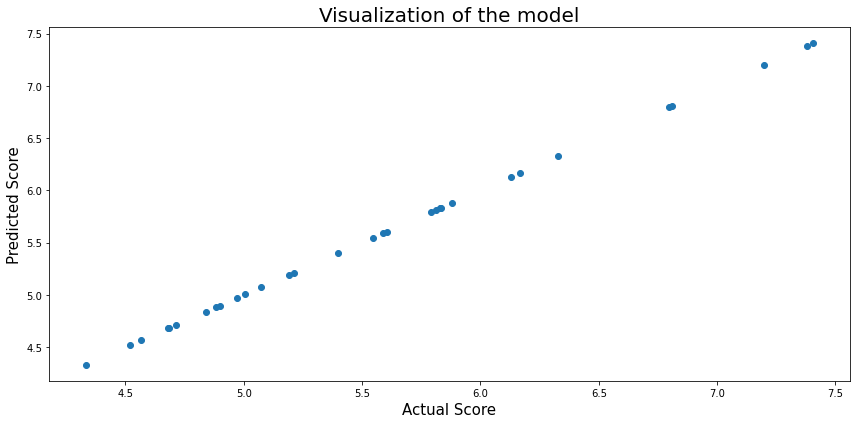

In [93]:
plt.figure(figsize = [12,6])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

In [94]:
#Model Evaluation

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [98]:
mean_squared_error(y_test,y_pred)

9.25139261993073e-08

In [97]:
mean_absolute_error(y_test,y_pred)

0.0002647169089188667

In [99]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0003041610201838942

In [100]:
#Lets check if the model is overfitting

In [103]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [104]:
#Lasso Regularization

In [121]:
lasscv = LassoCV(alphas=None,max_iter=2000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=2000, normalize=True)

In [122]:
#Best Alpha Parameter
alpha = lasscv.alpha_
alpha

8.704723081275664e-05

In [123]:
#Using the alpha to fit and predict

lass_LR = Lasso(alpha)
lass_LR.fit(x_train,y_train)

Lasso(alpha=8.704723081275664e-05)

In [124]:
lass_LR.score(x_test,y_test)

0.9999998628176868

In [125]:
#Since there is not much difference we can conclude that the model is not overfitting

In [127]:
rigcv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
rigcv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [129]:
alpha = rigcv.alpha_
alpha

0.001

In [130]:
rig_LR = Ridge(alpha)
rig_LR.fit(x_train,y_train)

Ridge(alpha=0.001)

In [131]:
rig_LR.score(x_test,y_test)

0.9999998720678641